<a href="https://colab.research.google.com/github/SashiniDawpadi/Ethereum_Gas_Price_Prediction_Model/blob/main/Gas_Cost_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Preprocessing

###Import the libraries

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 82.5 MB/s eta 0:00:00
   ━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import tensorflow as tf

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import xgboost as xgb

from pycaret.datasets import get_data
from pycaret.regression import setup, compare_models ,create_model , tune_model , stack_models , ensemble_model , blend_models ,plot_model,predict_model ,finalize_model

pd.set_option('display.float_format', lambda x: '%.4f' % x)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




###Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfBase = pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EthereumBlockDifficultyGrowth.csv')
dfBase.rename(index=str, columns={'Value': 'Difficulty', 'Date(UTC)': 'Date_UTC'}, inplace=True)

In [ ]:
dfBase = dfBase.assign(BlockRewards=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EthereumBlockRewardsChart.csv')['Value']).values)
dfBase = dfBase.assign(BlockSize=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EthereumBlockSizeHistory.csv')['Value']).values)
dfBase = dfBase.assign(HashRate=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EthereumNetworkHashRateGrowthRate.csv')['Value']).values)
dfBase = dfBase.assign(TotalTransactionFee=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EthereumTransactionFee.csv')['Value']).values)
dfBase = dfBase.assign(TransactionCount=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EthereumTransactionHistory.csv')['Value']).values)
dfBase = dfBase.assign(MarketCap=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EtherMarketCapChart.csv')['MarketCap']).values)
dfBase = dfBase.assign(PricePerUnit=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EtherMarketCapChart.csv')['Price']).values)
dfBase = dfBase.assign(SupplyOfCoins=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EtherMarketCapChart.csv')['Supply']).values)
dfBase = dfBase.assign(DailyGasUsage=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EthereumDailyGasUsedHistory.csv')['Value']).values)
dfBase = dfBase.assign(GasPrice=pd.Series(pd.read_csv('/content/drive/MyDrive/Eth_DataSet/EthereumGasPriceHistory.csv')['Value']).values)

In [ ]:
dfBase.head()

,Date_UTC,UnixTimeStamp,Difficulty,BlockRewards,BlockSize,HashRate,TotalTransactionFee,TransactionCount,MarketCap,PricePerUnit,SupplyOfCoins,DailyGasUsage,GasPrice
0,7/30/2015,1438214400,0.1210,39316.0938,644,11.5297,0,8893,0.0000,0.00,72049306.5938,0,0
1,7/31/2015,1438300800,0.6030,36191.7188,582,51.4594,0,0,0.0000,0.00,72085498.3125,0,0
2,8/1/2015,1438387200,0.8870,27705.9375,575,57.7845,0,0,0.0000,0.00,72113204.2500,0,0
3,8/2/2015,1438473600,1.0200,28223.4375,581,67.9224,0,0,0.0000,0.00,72141427.6875,0,0
4,8/3/2015,1438560000,1.1260,27976.7188,587,74.5737,0,0,0.0000,0.00,72169404.4062,0,0


In [ ]:
dfBase['PricePerUnit'].value_counts()

,count
PricePerUnit,
0.00,9
0.99,8
0.88,8
0.87,8
0.92,7
0.94,6
1.00,6
0.89,5
0.95,5


In [ ]:
dfBase.describe()

,UnixTimeStamp,Difficulty,BlockRewards,BlockSize,HashRate,TransactionCount,MarketCap,SupplyOfCoins,DailyGasUsage,GasPrice
count,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000,1164.0000
mean,1488456000.0000,1101.1667,26100.3442,9291.8668,82768.2660,275451.4579,20581.1710,88351630.2380,14323654558.8771,33644628384.0464
std,29044410.9047,1331.7641,5148.0352,9855.5106,105868.3987,318758.9354,27620.1847,9137715.4469,16800775014.1879,46524231213.5950
min,1438214400.0000,0.1210,14852.5000,575.0000,11.5297,0.0000,0.0000,72049306.5938,0.0000,0.0000
25%,1463335200.0000,37.0478,20537.5547,1423.7500,2786.4473,37166.0000,785.8860,80085942.6094,1177482242.5000,22052464990.0000
50%,1488456000.0000,156.6135,26675.4688,2209.0000,11610.2555,63517.5000,1625.7463,89400623.8594,2656251994.5000,23149679504.5000
75%,1513576800.0000,2350.3805,31439.6094,19595.7500,143765.4721,539045.7500,31728.3616,96430549.4375,34597632984.7500,35397921076.2500
max,1538697600.0000,3606.0360,39316.0938,33681.0000,295911.9974,1349890.0000,134295.8144,102390791.1875,45392269325.0000,939588332579.0000


###Data Formatting and Cleanup

In [ ]:
dfBase.TotalTransactionFee = pd.to_numeric(dfBase.TotalTransactionFee.str.pad(dfBase.TotalTransactionFee.str.len().max(), 'left', '0').str.slice(0,18,1)) / (10**14)
dfBase.GasPrice = dfBase.GasPrice / (10**9)
dfBase.PricePerUnit = pd.to_numeric(dfBase.PricePerUnit.str.replace(',',''))

In [ ]:
dfBase['TotalTransactionFee'].value_counts()

,count
TotalTransactionFee,
0.0000,8
208.0367,1
656.8346,1
385.0734,1
403.1631,1
371.1831,1
660.8595,1
636.9715,1
408.7683,1


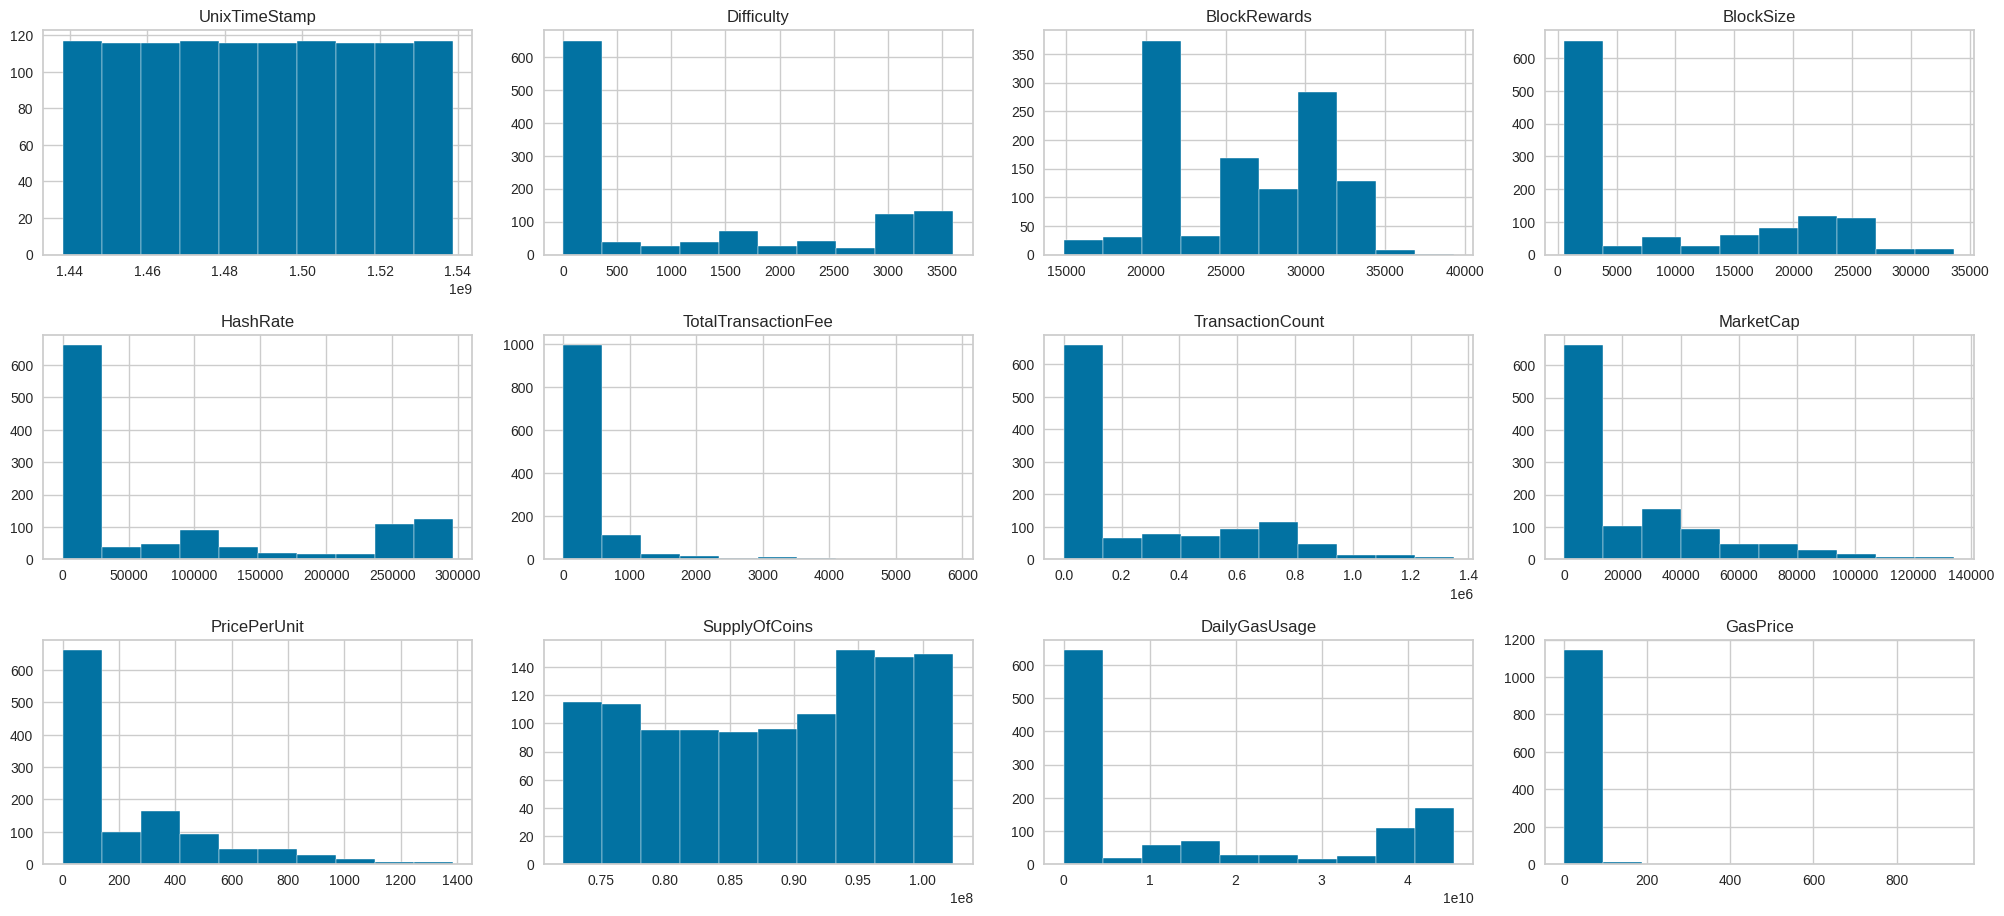

In [ ]:
dfBase.hist(layout=(5, 4), figsize=(20, 15))
plt.tight_layout()
plt.show()

###Data Normalization

In [ ]:
df_Normalized = dfBase.copy()
df_Normalized.set_index('Date_UTC', inplace=True)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
df_Normalized[df_Normalized.columns] = min_max_scaler.fit_transform(df_Normalized[df_Normalized.columns])

In [ ]:
df_Normalized.head()

,UnixTimeStamp,Difficulty,BlockRewards,BlockSize,HashRate,TotalTransactionFee,TransactionCount,MarketCap,PricePerUnit,SupplyOfCoins,DailyGasUsage,GasPrice
Date_UTC,,,,,,,,,,,,
7/30/2015,0.0000,0.0000,1.0000,0.0021,0.0000,0.0000,0.0066,0.0000,0.0000,0.0000,0.0000,0.0000
7/31/2015,0.0009,0.0001,0.8723,0.0002,0.0001,0.0000,0.0000,0.0000,0.0000,0.0012,0.0000,0.0000
8/1/2015,0.0017,0.0002,0.5254,0.0000,0.0002,0.0000,0.0000,0.0000,0.0000,0.0021,0.0000,0.0000
8/2/2015,0.0026,0.0002,0.5466,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0030,0.0000,0.0000
8/3/2015,0.0034,0.0003,0.5365,0.0004,0.0002,0.0000,0.0000,0.0000,0.0000,0.0040,0.0000,0.0000


In [ ]:
df_Normalized.corr('pearson')

,UnixTimeStamp,Difficulty,BlockRewards,BlockSize,HashRate,TotalTransactionFee,TransactionCount,MarketCap,PricePerUnit,SupplyOfCoins,DailyGasUsage,GasPrice
UnixTimeStamp,1.0000,0.8921,-0.6583,0.8788,0.8826,0.5583,0.8383,0.7457,0.7411,0.9960,0.8909,-0.3056
Difficulty,0.8921,1.0000,-0.8465,0.9375,0.9755,0.5672,0.8707,0.7931,0.7847,0.8603,0.9434,-0.1956
BlockRewards,-0.6583,-0.8465,1.0000,-0.8445,-0.7833,-0.5241,-0.7742,-0.7243,-0.7219,-0.6318,-0.8018,0.0549
BlockSize,0.8788,0.9375,-0.8445,1.0000,0.9221,0.6772,0.9635,0.8907,0.8864,0.8534,0.9686,-0.1734
HashRate,0.8826,0.9755,-0.7833,0.9221,1.0000,0.5789,0.8924,0.8067,0.7959,0.8424,0.9681,-0.1901
TotalTransactionFee,0.5583,0.5672,-0.5241,0.6772,0.5789,1.0000,0.6992,0.6994,0.6990,0.5443,0.6782,0.0409
TransactionCount,0.8383,0.8707,-0.7742,0.9635,0.8924,0.6992,1.0000,0.9467,0.9433,0.8151,0.9588,-0.1616
MarketCap,0.7457,0.7931,-0.7243,0.8907,0.8067,0.6994,0.9467,1.0000,0.9997,0.7313,0.8758,-0.1240
PricePerUnit,0.7411,0.7847,-0.7219,0.8864,0.7959,0.6990,0.9433,0.9997,1.0000,0.7284,0.8686,-0.1233
SupplyOfCoins,0.9960,0.8603,-0.6318,0.8534,0.8424,0.5443,0.8151,0.7313,0.7284,1.0000,0.8574,-0.3127


###Removing the outliers

In [ ]:
df_Normalized.drop(['UnixTimeStamp','TotalTransactionFee','SupplyOfCoins','MarketCap'], axis=1, inplace=True)

In [ ]:
numeric_columns = ['Difficulty','BlockRewards','BlockSize','HashRate','TransactionCount','DailyGasUsage','GasPrice']

df_Normalized[numeric_columns] = df_Normalized[numeric_columns].apply(pd.to_numeric, errors='coerce')

# IQR method for outlier detection
Q1 = df_Normalized[numeric_columns].quantile(0.25)
Q3 = df_Normalized[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((df_Normalized[numeric_columns] < lower_bound) | (df_Normalized[numeric_columns] > upper_bound)).any(axis=1)

In [ ]:
df_Normalized = df_Normalized[~outliers]
df_Normalized.head()

,Difficulty,BlockRewards,BlockSize,HashRate,TransactionCount,PricePerUnit,DailyGasUsage,GasPrice
Date_UTC,,,,,,,,
8/30/2015,0.0018,0.2698,0.0034,0.0011,0.0034,0.0010,0.0023,0.0587
9/3/2015,0.0023,0.1034,0.0054,0.0011,0.0035,0.0009,0.0028,0.0586
9/5/2015,0.0017,0.4405,0.0054,0.0012,0.0041,0.0010,0.0035,0.0583
9/6/2015,0.0017,0.4626,0.0048,0.0013,0.0041,0.0010,0.0031,0.0586
9/7/2015,0.0017,0.4336,0.0054,0.0012,0.0042,0.0009,0.0038,0.0570


In [ ]:
df_Normalized.shape

(1035, 8)

##Regression

###Selecting the regression model

In [ ]:
clf1 = setup(df_Normalized, target='GasPrice', fold=10)

,Description,Value
0,Session id,485
1,Target,GasPrice
2,Target type,Regression
3,Original data shape,"(1035, 8)"
4,Transformed data shape,"(1035, 8)"
5,Transformed train set shape,"(724, 8)"
6,Transformed test set shape,"(311, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
check_model = compare_models(exclude=['catboost'],fold=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0020,0.0000,0.0035,0.9206,0.0034,0.0795,0.2300
lightgbm,Light Gradient Boosting Machine,0.0023,0.0000,0.0038,0.9044,0.0037,0.0917,0.3225
xgboost,Extreme Gradient Boosting,0.0023,0.0000,0.0040,0.8931,0.0039,0.0918,0.0800
rf,Random Forest Regressor,0.0022,0.0000,0.0040,0.8921,0.0039,0.0877,0.8175
knn,K Neighbors Regressor,0.0023,0.0000,0.0041,0.8838,0.0040,0.0892,0.0575
gbr,Gradient Boosting Regressor,0.0024,0.0000,0.0043,0.8772,0.0041,0.0956,0.1750
dt,Decision Tree Regressor,0.0027,0.0000,0.0050,0.8310,0.0049,0.1095,0.0575
ada,AdaBoost Regressor,0.0039,0.0000,0.0053,0.8168,0.0051,0.1726,0.1150
br,Bayesian Ridge,0.0060,0.0001,0.0087,0.5069,0.0084,0.2371,0.0300
lr,Linear Regression,0.0060,0.0001,0.0087,0.5067,0.0084,0.2380,1.2575


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

###Create the models

####Extra Trees

In [ ]:
extratrees = create_model('et',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0019,0.0000,0.0030,0.9436,0.0029,0.0775
1,0.0022,0.0000,0.0039,0.8927,0.0038,0.0883
2,0.0019,0.0000,0.0035,0.9239,0.0034,0.0742
3,0.0018,0.0000,0.0031,0.9353,0.0030,0.0708
4,0.0023,0.0000,0.0042,0.8802,0.0041,0.0894
Mean,0.0020,0.0000,0.0036,0.9151,0.0034,0.0800
Std,0.0002,0.0000,0.0005,0.0246,0.0005,0.0075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

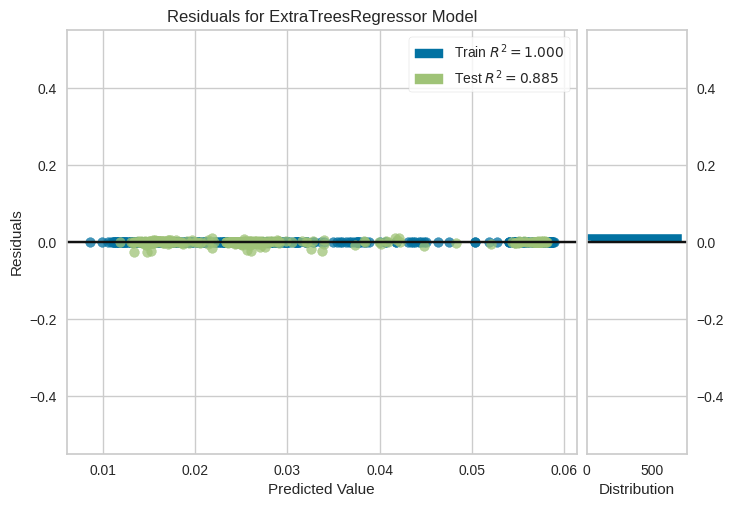

In [ ]:
plot_model(extratrees)

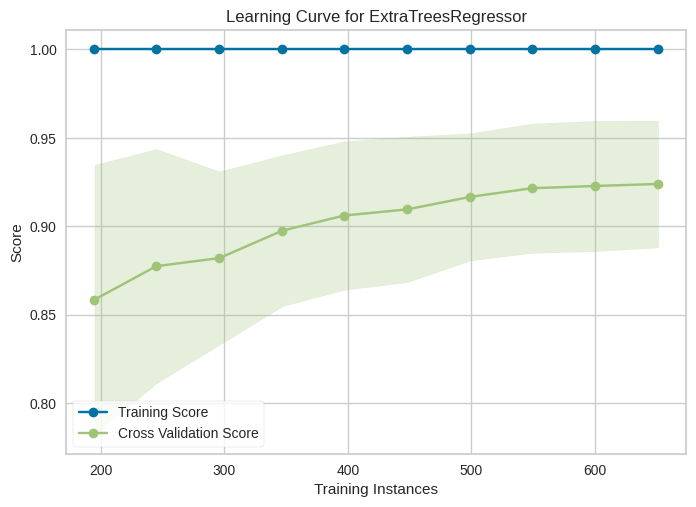

In [ ]:
plot_model(extratrees, plot='learning')

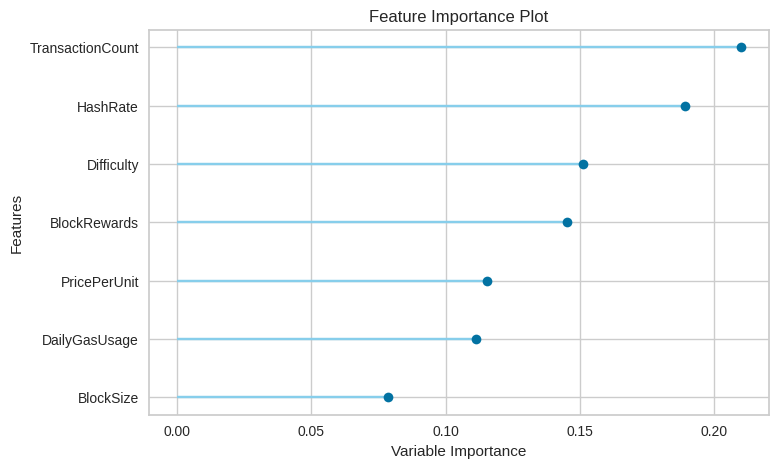

In [ ]:
plot_model(extratrees, plot='feature')

####Random Forest

In [ ]:
randomForest = create_model('rf',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0021,0.0000,0.0033,0.9308,0.0032,0.0911
1,0.0026,0.0000,0.0049,0.8358,0.0047,0.1052
2,0.0022,0.0000,0.0041,0.8994,0.0039,0.0818
3,0.0018,0.0000,0.0033,0.9260,0.0032,0.0706
4,0.0024,0.0000,0.0049,0.8424,0.0047,0.0937
Mean,0.0022,0.0000,0.0041,0.8869,0.0040,0.0885
Std,0.0003,0.0000,0.0007,0.0405,0.0007,0.0116


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

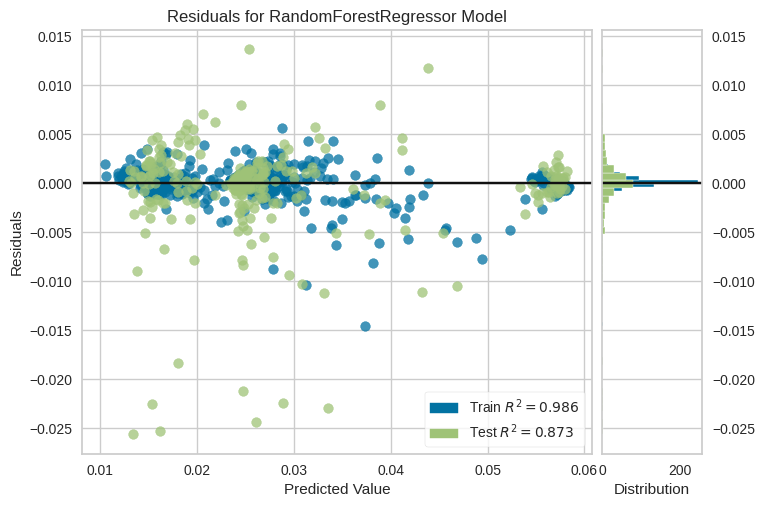

In [ ]:
plot_model(randomForest)

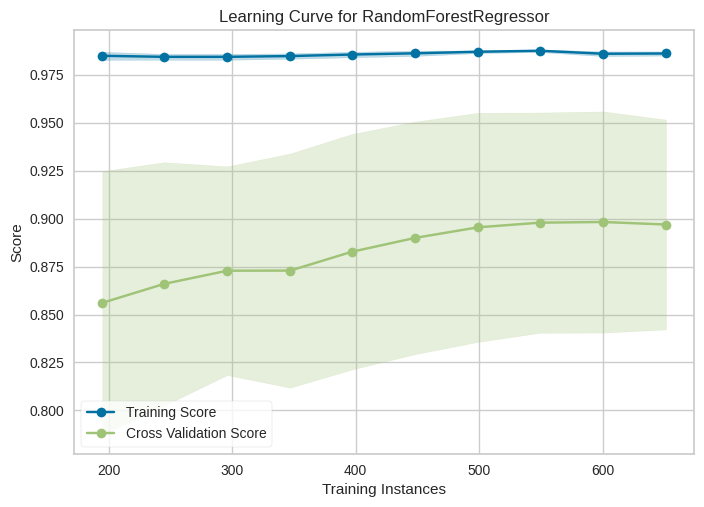

In [ ]:
plot_model(randomForest, plot='learning')

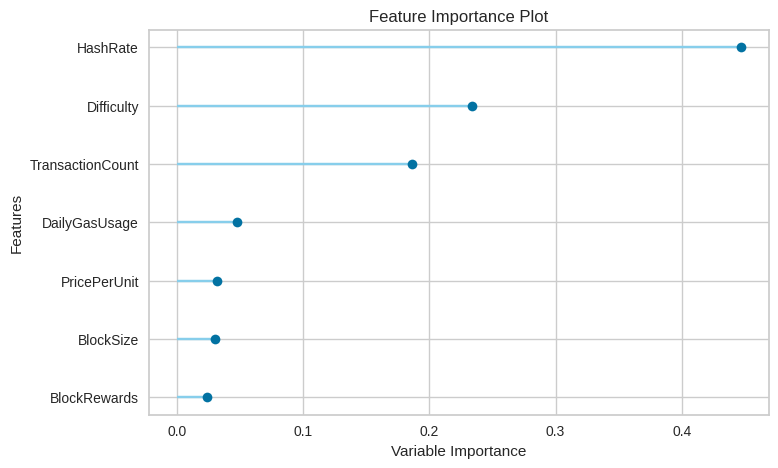

In [ ]:
plot_model(randomForest, plot='feature')

####XGBoost

In [ ]:
xgboost = create_model('xgboost',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0022,0.0000,0.0037,0.9113,0.0036,0.0918
1,0.0031,0.0000,0.0062,0.7378,0.0059,0.1250
2,0.0021,0.0000,0.0038,0.9141,0.0036,0.0799
3,0.0018,0.0000,0.0032,0.9299,0.0031,0.0736
4,0.0025,0.0000,0.0048,0.8446,0.0047,0.0965
Mean,0.0023,0.0000,0.0043,0.8675,0.0042,0.0934
Std,0.0004,0.0000,0.0010,0.0712,0.0010,0.0178


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

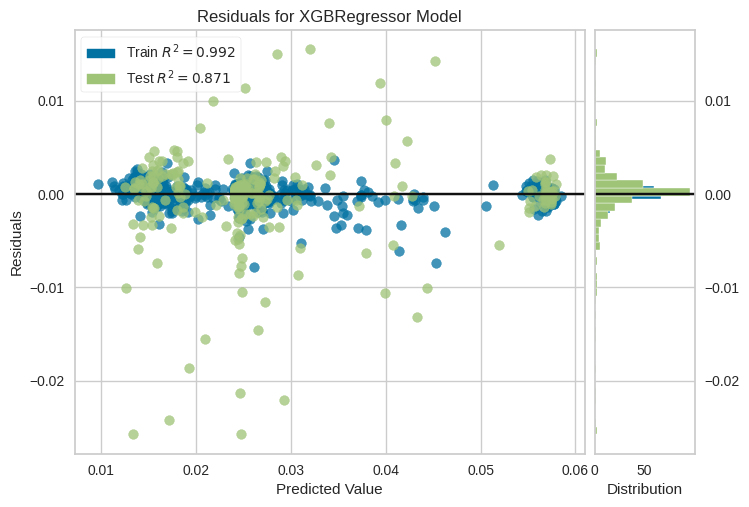

In [ ]:
plot_model(xgboost)

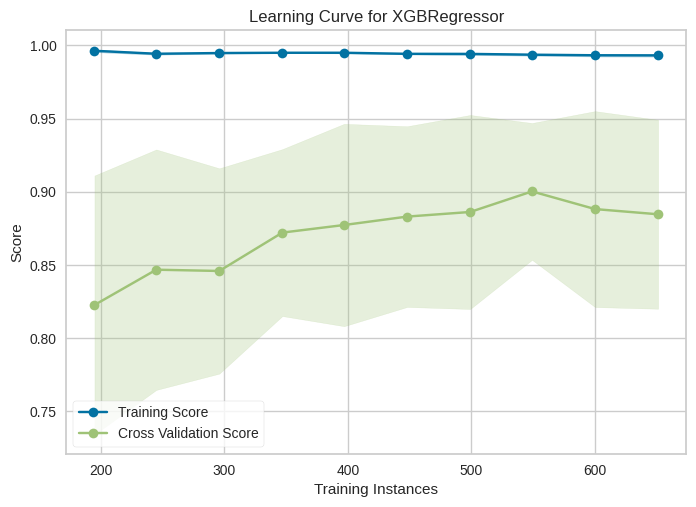

In [ ]:
plot_model(xgboost, plot='learning')

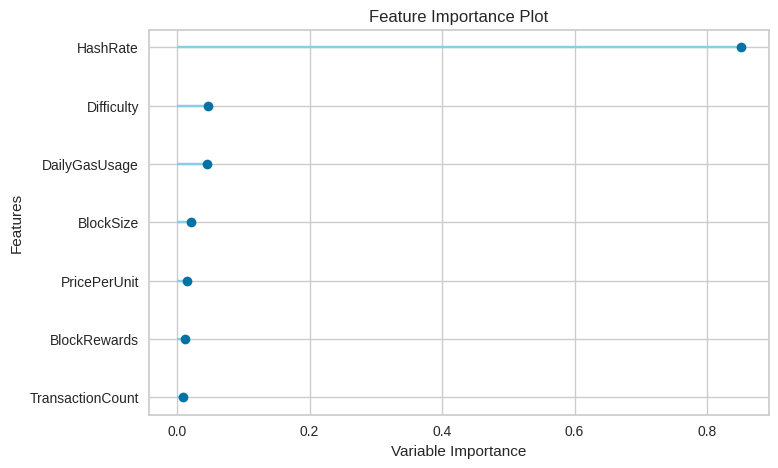

In [ ]:
plot_model(xgboost, plot='feature')

####GradientBoosting

In [ ]:
gradientboosting = create_model('gbr',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0021,0.0000,0.0033,0.9332,0.0032,0.0884
1,0.0029,0.0000,0.0055,0.7892,0.0053,0.1189
2,0.0020,0.0000,0.0035,0.9243,0.0034,0.0762
3,0.0021,0.0000,0.0038,0.9018,0.0037,0.0838
4,0.0027,0.0000,0.0054,0.8053,0.0052,0.1032
Mean,0.0024,0.0000,0.0043,0.8708,0.0042,0.0941
Std,0.0004,0.0000,0.0010,0.0611,0.0009,0.0152


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

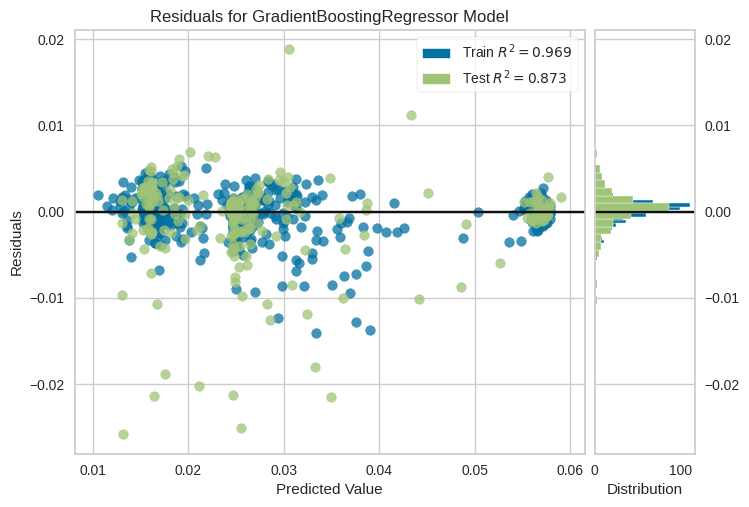

In [ ]:
plot_model(gradientboosting)

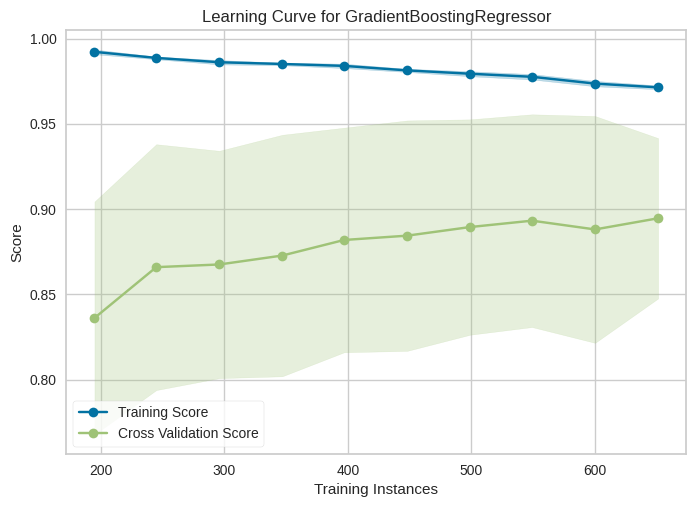

In [ ]:
plot_model(gradientboosting, plot='learning')

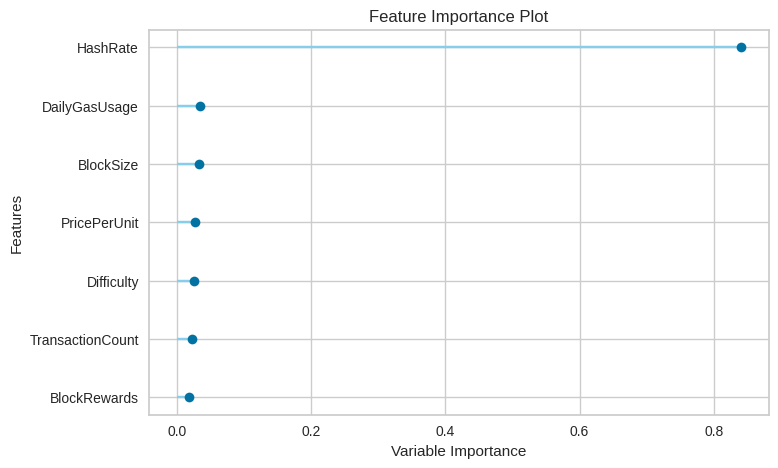

In [ ]:
plot_model(gradientboosting, plot='feature')

####LightGBM

In [ ]:
lgbm = create_model('lightgbm',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0021,0.0000,0.0034,0.9275,0.0033,0.0870
1,0.0023,0.0000,0.0040,0.8910,0.0038,0.0912
2,0.0023,0.0000,0.0041,0.8990,0.0039,0.0901
3,0.0022,0.0000,0.0038,0.9041,0.0036,0.0894
4,0.0026,0.0000,0.0046,0.8597,0.0044,0.1083
Mean,0.0023,0.0000,0.0040,0.8963,0.0038,0.0932
Std,0.0002,0.0000,0.0004,0.0220,0.0004,0.0077


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

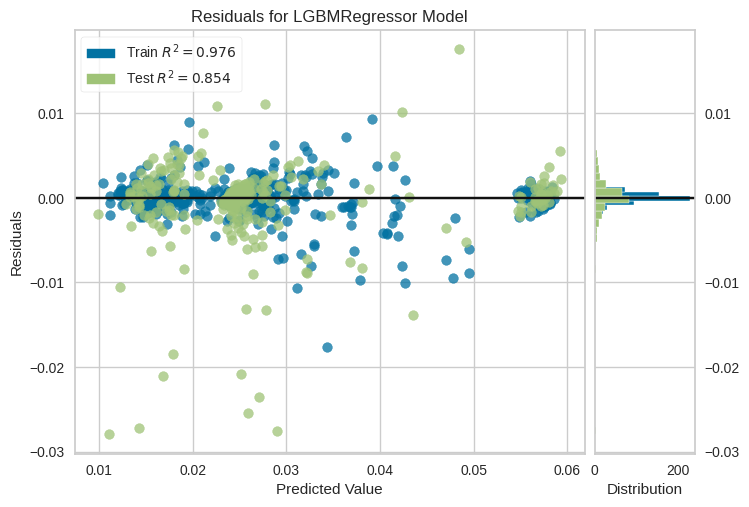

In [ ]:
plot_model(lgbm)

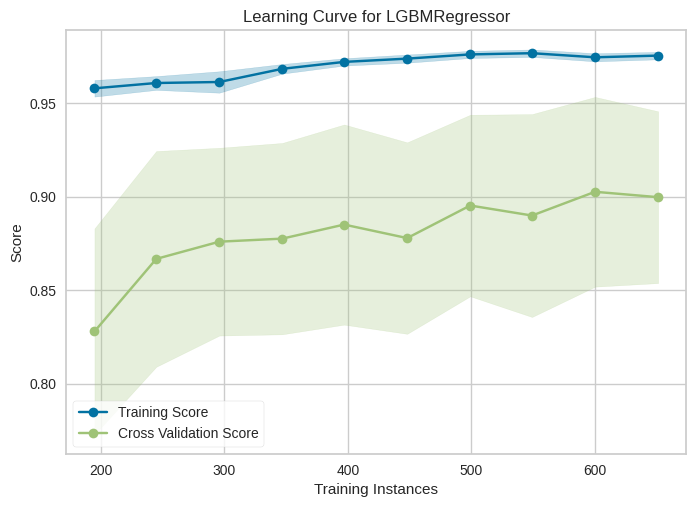

In [ ]:
plot_model(lgbm, plot='learning')

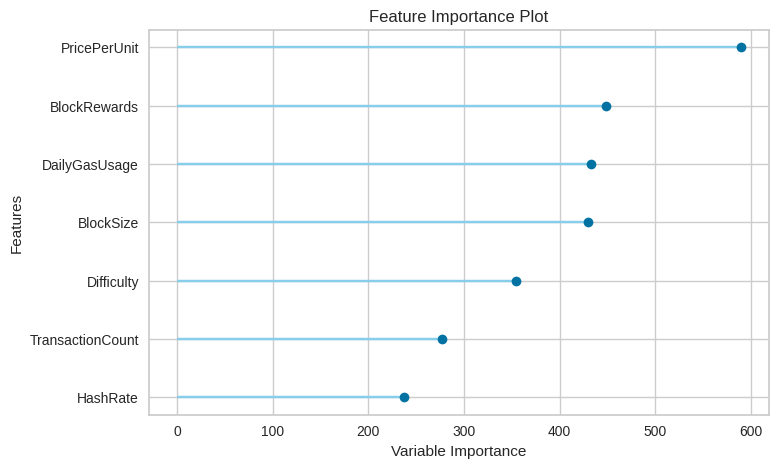

In [ ]:
plot_model(lgbm, plot='feature')

####KNN

In [ ]:
knn = create_model('knn',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0021,0.0000,0.0032,0.9342,0.0031,0.0855
1,0.0024,0.0000,0.0045,0.8589,0.0044,0.0902
2,0.0023,0.0000,0.0040,0.9007,0.0039,0.0932
3,0.0019,0.0000,0.0034,0.9192,0.0033,0.0722
4,0.0027,0.0000,0.0054,0.8067,0.0052,0.1047
Mean,0.0023,0.0000,0.0041,0.8839,0.0040,0.0892
Std,0.0003,0.0000,0.0008,0.0461,0.0007,0.0106


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

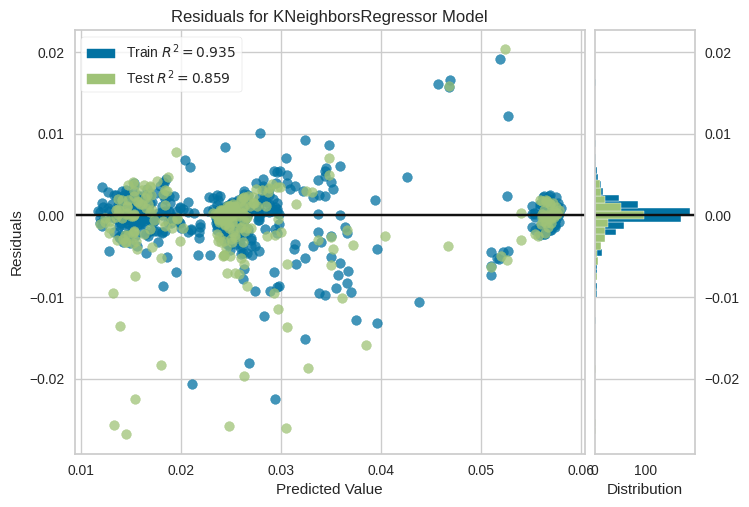

In [ ]:
plot_model(knn)

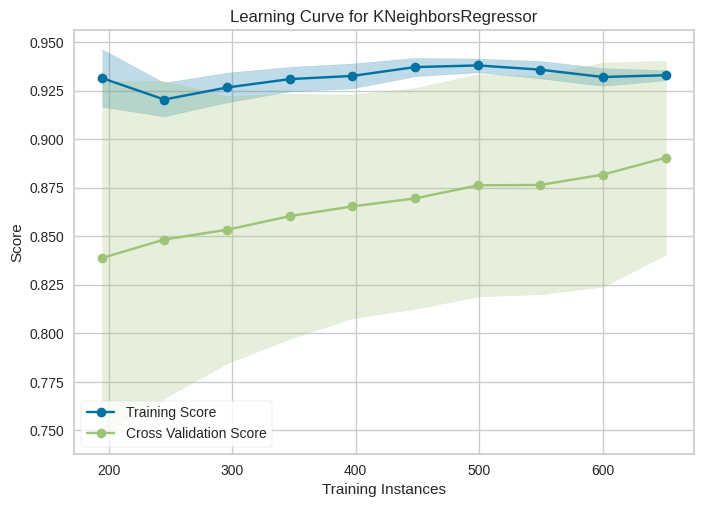

In [ ]:
plot_model(knn, plot='learning')

####Decision tree

In [ ]:
decisiontree = create_model('dt',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0024,0.0000,0.0039,0.9019,0.0038,0.0925
1,0.0031,0.0000,0.0061,0.7389,0.0059,0.1251
2,0.0028,0.0000,0.0056,0.8115,0.0054,0.1099
3,0.0025,0.0000,0.0046,0.8551,0.0045,0.1052
4,0.0030,0.0000,0.0060,0.7561,0.0059,0.1175
Mean,0.0028,0.0000,0.0053,0.8127,0.0051,0.1101
Std,0.0003,0.0000,0.0009,0.0607,0.0008,0.0111


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

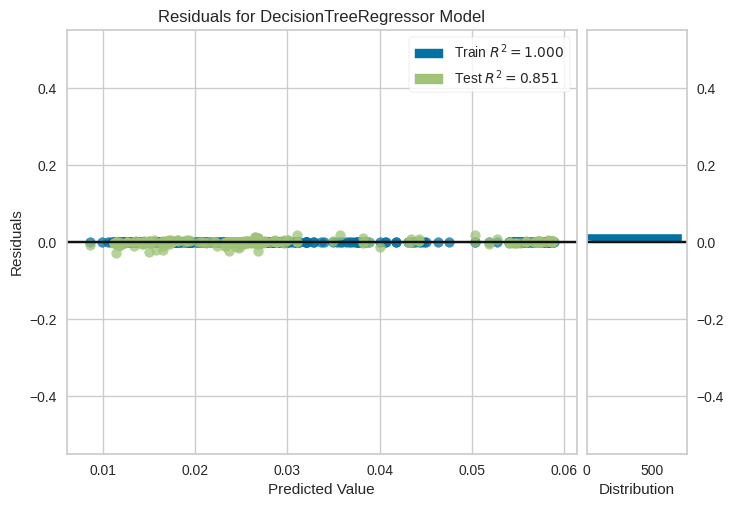

In [ ]:
plot_model(decisiontree)

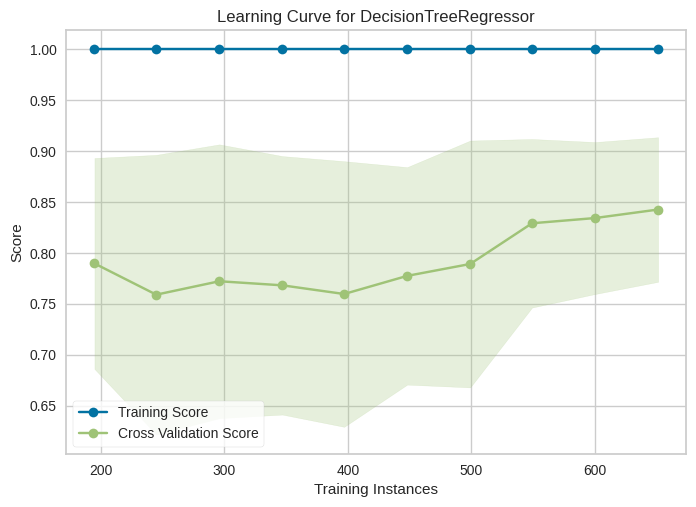

In [ ]:
plot_model(decisiontree, plot='learning')

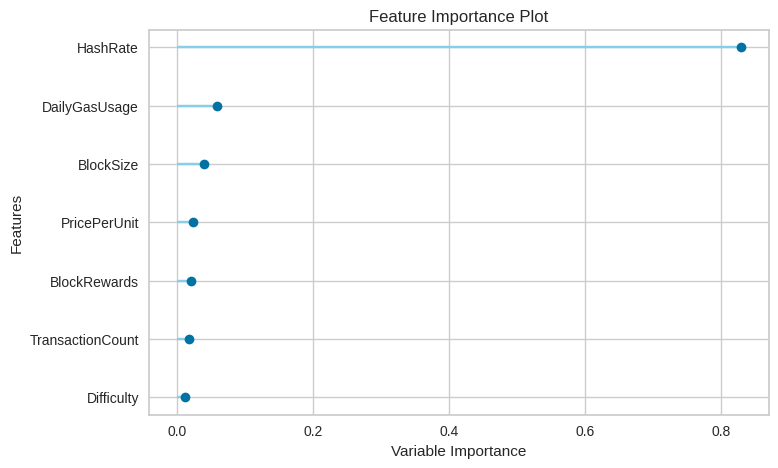

In [ ]:
plot_model(decisiontree, plot='feature')

###Hyper parameter tuning

In [ ]:
tune_knn = tune_model(knn, n_iter=5,optimize="MSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0024,0.0000,0.0038,0.9048,0.0037,0.0903
1,0.0017,0.0000,0.0025,0.9615,0.0024,0.0698
2,0.0026,0.0000,0.0047,0.7695,0.0046,0.1109
3,0.0030,0.0000,0.0052,0.8593,0.0050,0.1076
4,0.0021,0.0000,0.0033,0.9431,0.0032,0.0896
5,0.0022,0.0000,0.0047,0.8404,0.0045,0.0742
6,0.0020,0.0000,0.0040,0.8937,0.0039,0.0688
7,0.0022,0.0000,0.0039,0.8893,0.0038,0.0877
8,0.0024,0.0000,0.0042,0.8710,0.0041,0.0986


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


###Stacking

In [ ]:
stacked_extratrees = stack_models(estimator_list=[extratrees,randomForest,xgboost,gradientboosting,lgbm,knn,decisiontree], meta_model=tune_knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0026,0.0000,0.0043,0.8821,0.0041,0.0972
1,0.0017,0.0000,0.0025,0.9604,0.0025,0.0757
2,0.0022,0.0000,0.0037,0.8589,0.0036,0.0946
3,0.0027,0.0000,0.0047,0.8814,0.0046,0.1044
4,0.0015,0.0000,0.0024,0.9697,0.0023,0.0691
5,0.0022,0.0000,0.0044,0.8627,0.0042,0.0797
6,0.0019,0.0000,0.0033,0.9269,0.0032,0.0690
7,0.0019,0.0000,0.0031,0.9333,0.0030,0.0847
8,0.0018,0.0000,0.0033,0.9220,0.0032,0.0769


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

###Ensemble

In [ ]:
ensemble_extratrees = ensemble_model(extratrees,method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0023,0.0000,0.0036,0.9147,0.0035,0.0886
1,0.0015,0.0000,0.0022,0.9699,0.0021,0.0682
2,0.0018,0.0000,0.0030,0.9085,0.0029,0.0821
3,0.0025,0.0000,0.0044,0.8971,0.0043,0.0947
4,0.0016,0.0000,0.0026,0.9649,0.0025,0.0683
5,0.0019,0.0000,0.0037,0.9020,0.0036,0.0645
6,0.0015,0.0000,0.0028,0.9496,0.0027,0.0556
7,0.0019,0.0000,0.0034,0.9175,0.0033,0.0812
8,0.0019,0.0000,0.0033,0.9207,0.0032,0.0829


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

###Blending

In [ ]:
blender = blend_models(estimator_list=[extratrees,randomForest,xgboost,gradientboosting,lgbm,knn,decisiontree],fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0020,0.0000,0.0030,0.9416,0.0029,0.0872
1,0.0021,0.0000,0.0038,0.9128,0.0037,0.0851
2,0.0019,0.0000,0.0035,0.9140,0.0034,0.0729
3,0.0023,0.0000,0.0045,0.8638,0.0044,0.0904
Mean,0.0021,0.0000,0.0037,0.9080,0.0036,0.0839
Std,0.0001,0.0000,0.0006,0.0280,0.0005,0.0067


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

##Prediction

In [ ]:
final_blended = finalize_model(blender)

In [ ]:
new_data =pd.DataFrame({
    'Difficulty':[0.0018],
    'BlockRewards':	[0.2658],
    'BlockSize'	:[0.0034],
    'HashRate':	[0.0011],
    'TransactionCount':	[0.0034],
    'PricePerUnit':	[0.0010],
    'DailyGasUsage':	[0.0023],
    })

In [ ]:
predictions = predict_model(final_blended, data=new_data)
print(predictions.prediction_label)

0   0.0577
Name: prediction_label, dtype: float64


In [ ]:
predicted_values = predictions['prediction_label']

scaler_target = MinMaxScaler()
scaler_target.fit(df_Normalized[['GasPrice']])

real_predicted_values = scaler_target.inverse_transform(predicted_values.values.reshape(-1, 1))
predictions['Real_Predicted_GasPrice'] = real_predicted_values
print(predictions[['Real_Predicted_GasPrice']])


   Real_Predicted_GasPrice
0                   0.0115


In [ ]:
predictions[['Real_Predicted_GasPrice']] = predictions[['Real_Predicted_GasPrice']] * (10**9)
predictions[['Real_Predicted_GasPrice']]

,Real_Predicted_GasPrice
0,11492722.4341
